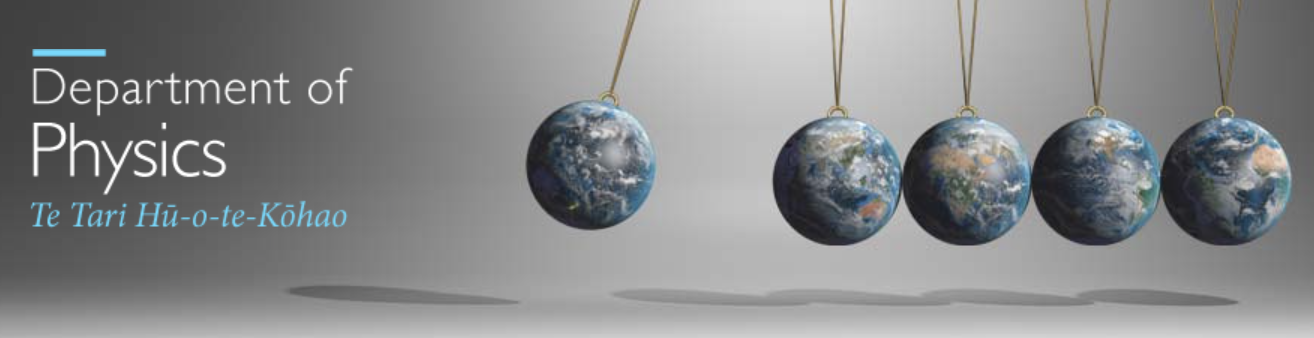

$$
\def\julia{\texttt{julia}}
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
\def\qq{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
$$

# PHSI 365: Computational Physics 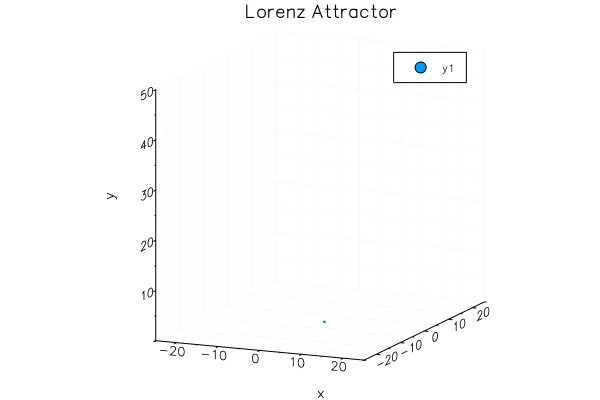

University of Otago, 2019

Dr. Ashton Bradley (Coordinator)
<br>
ashton.bradley@otago.ac.nz
<br>

_Image made with_ [Plots.jl](http://docs.juliaplots.org/latest/)

# Course outline (Lectures 1-10)

- Introduction to Julia

- Dimensional analysis

- Dynamical Systems: Ordinary Differential Equations

- Systems of coupled ODEs: waves, dispersion, PDEs

# Philosophy
- Typically, physical problems are fundamentally **nonlinear**. 

- This is what makes nature interesting, i.e. unpredictable, and often challenging to understand analyticaly. Also gives rise to emergent collective phenomena that make the universe a rich and ever-change tapestry of wonder!

- To understand the complexity of Nature, we need tools of *linear* and *nonlinear* dynamics and analysis
- Example: [Jupiter's great red spot](https://en.wikipedia.org/wiki/Great_Red_Spot#/media/File:Great_Red_Spot_From_Voyager_1.jpg)

# Introduction to julia
- Key language features
- Strategies/troubleshooting
- Numerical issues: error, accuracy, stability
- Visualising your results

$\julia$ is a high level programming language unlike any of its predecessors. It allows programming in a high level syntax, while still achieving very high performance ($\sim$C speed). While designed for technical computing, it is also a fully featured general programming language. It has excellent buit in help facilities and a logical structure which allows us to focus more on problem solving rather than programme writing. $\julia$ also has a very modular and highly extendable design, and these features are straightforwardd to utilise for the general user. 
- Most of $\julia$ is written in $\julia$!

To start $\julia$, open a terminal (black box icon for those not familiar), and type `julia`. This will give you a command prompt known as "the REPL" (Read, Rvaluate, Print, Loop):

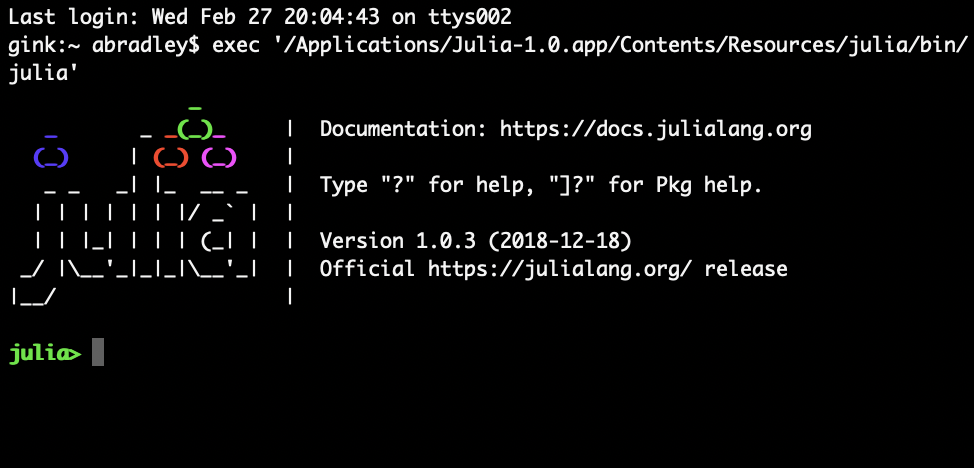

To get help directly in the REPL, type, for example
```julia
julia> ?rand
``` 
at the command prompt, giving the result

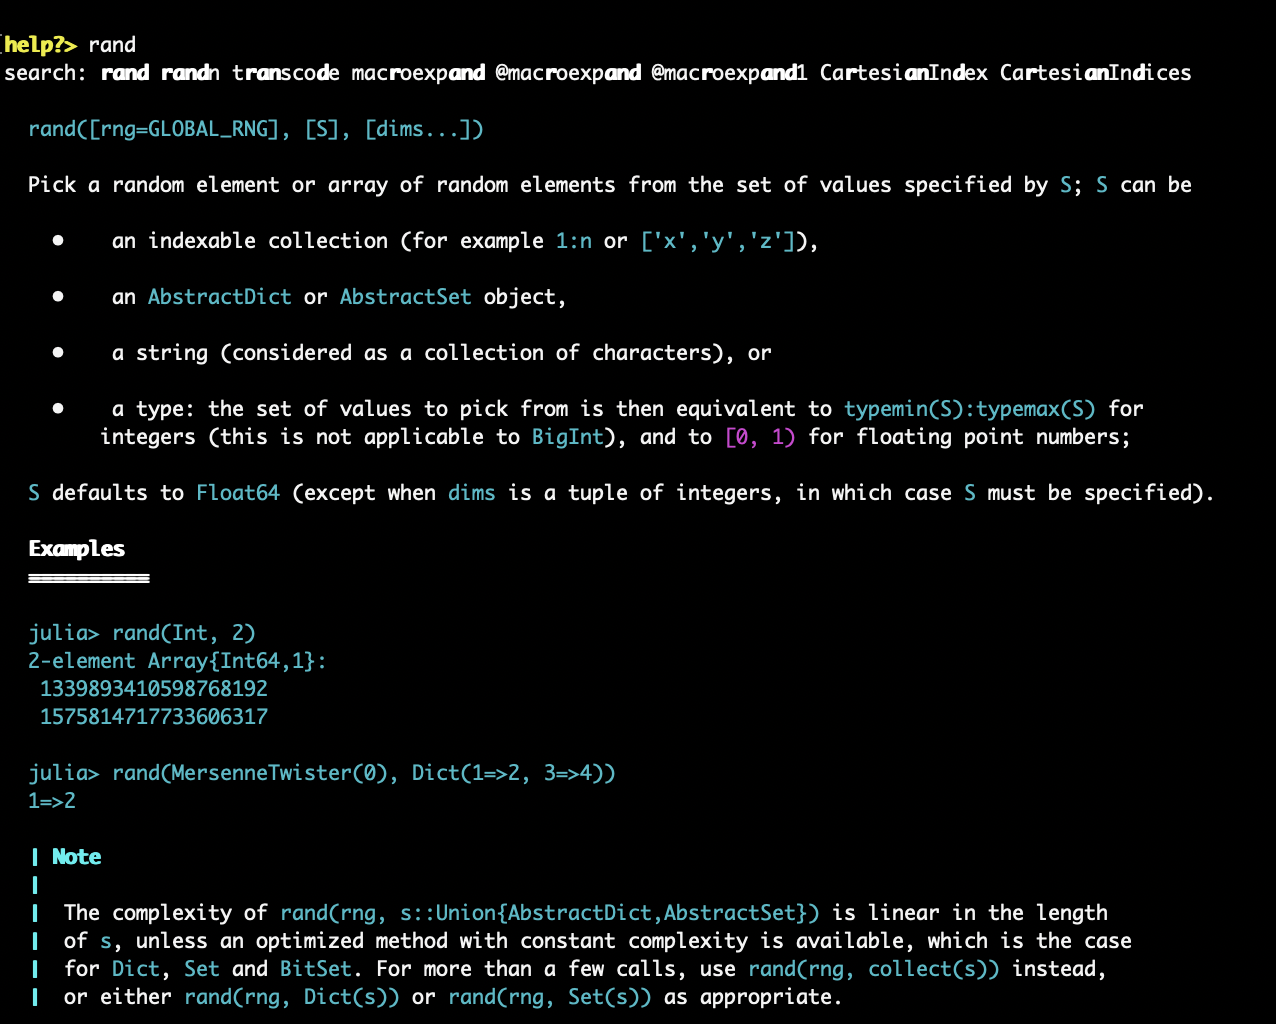

You have access to all of $\julia$ from the REPL. In it's simplest form it is just a fancy calculator. In it's most sophisticated form, [julia is the first high-level language to join the petaflop club](https://juliacomputing.com/communication/2017/09/12/julia-joins-petaflop-club.html) ($10^{15}$ floating point operations per second).

## Comments
First thing first, how do we comment our code so that other people can make sense of it? So that we can make sense of it ourselves when we come back to in 2 months?

- Code is read much more than it is written. 
- Your aim should be to write code the is first and foremost readible.
- __Value clear verbose code over short "clever" code.__

In [26]:
# a comment in julia 

In [ ]:
#= 
a larger 
(multiline) 
comment block 
=#

In [ ]:
# or you can just 
# select any code
# and type [option] /
# - very handy when debugging!

## Jupyter
Some tips about using jupyter effectively. 
- Kernel menu


## Plotting 

In [15]:
using Plots, LaTeXStrings # load packages
gr(size=(500,250),grid=false,legend=:bottomright) # set defaults

Plots.GRBackend()

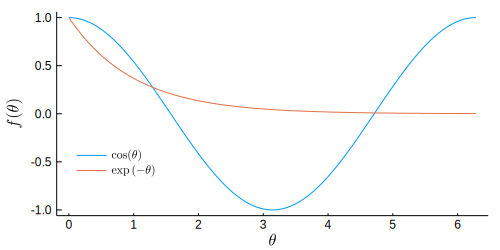

In [16]:
x = LinRange(0,2*pi,100)
plot(x,cos.(x),label=L"\cos(\theta)",fg_legend=:transparent,legend=:bottomleft)
xlabel!(L"\theta");ylabel!(L"f(\theta)")
plot!(x,exp.(-x),label=L"\exp{(-\theta)}")

In [17]:
x=3; y=6.2; println(x) # ; is used to separate more than one command on the same line

3


### codequiz:
What does this do:

In [18]:
a,b = 1+2,30-1

(3, 29)

## Strings and Unicode input

In [19]:
println("Hello world, it is I ... Julia!")

Hello world, it is I ... Julia!


In [20]:
println("println let's you splice strings together with numbers, e.g. a constant like ",
    pi,", or variables e.g. x = ",x,", or y = $y" )

println let's you splice strings together with numbers, e.g. a constant like π, or variables e.g. x = 3, or y = 6.2


- We see `$y` splices the value of y as a string object into the string (this is called string interpolation)
- Also note that `println` allows you to pass in variables and strings as a comma separated list, generating a sensible result.

### codequiz:

In [21]:
"hello"*" "*"juila"

"hello juila"

In [ ]:
# another kind of input (unicode): typing the sequence
# i\hbar<\tab>\psi<\tab>\dot<\tab>=H\hat<\tab>\psi<\tab> will format as
# iħψ̇=Ĥψ
# There are a lot of supported symbols accessible via tab-completion:

In [7]:
iħψ̇ = Ĥψ # unicode input in code mode - similar to latex input in markdown mode

UndefVarError: UndefVarError: Ĥψ not defined

In [23]:
ψ=3

3

We can also enter text in markdown mode, including LaTeX in-line $\langle x\rangle=\pi$, and line equations:
$$i\hbar\frac{\partial\psi}{\partial t}=\hat{H}\psi$$
More on **jupyter** input with markdown later...

- [Unicode list for julia](https://docs.julialang.org/en/v1/manual/unicode-input/)
- Check out the markdown for this cell!
- `\:smiling_imp:<tab>` will invoke 

In [ ]:
😈 # let's use this as a variable name

In [9]:
😈=10

10

a totally legitimate statement in $\julia$!

## Types
If this is your first encounter with data types, here is what you need to know
- Every piece of data has a type, in any language. 
- In a __weakly typed language__ the type information is hidden and/or not strictly enforced
- In a __strongly typed language__ all types must be excplicitly declared, and operations (i.e. functions) are strictly limited to particular input types.
- $\julia$ is ___optionally typed___: it is possible to get a long way without caring about types. But the more you help the compiler with type information, the better code it can write for you. 

For now, we will simple mention some obvious points in passing, and we will learn how to address a couple of common problems associated with types.

In [25]:
pi

π = 3.1415926535897...

In [24]:
π

π = 3.1415926535897...

In [26]:
typeof(π)

Irrational{:π}

In [27]:
# julia imaginary unit √-1 ≡ im
im^2

-1 + 0im

In [28]:
typeof(ans)

Complex{Int64}

Let's evaluate the famous formula 

$$ e^{i\pi} + 1 = 0$$

In [29]:
exp(im*pi)+1

0.0 + 1.2246467991473532e-16im

### codequiz: what will this return?

In [30]:
typeof(ans)

Complex{Float64}

In [31]:
a=1

1

In [32]:
a |> Float64 # type conversion!

1.0

In [33]:
Float64(a)

1.0

- Float64 is a data type, but also a conversion method
- `|>` directs the output of one function to the input of another

In [35]:
# also supports variable precision arithmetic
# let's get π to 3000 digits
mypi = BigFloat(pi,3000) # default is "double-double" or 128 bit floating point.

3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035988

In [36]:
exp(im*mypi) + 1

0.0 - 5.139657999243271600268924491804683230804890359522076358819175943827622169196671e-904im

How is that for zero!

In [37]:
# julia range object
xrange = LinRange(0,2π,100)

100-element LinRange{Float64}:
 0.0,0.0634665,0.126933,0.1904,0.253866,…,6.09279,6.15625,6.21972,6.28319

In [38]:
typeof(xrange)

LinRange{Float64}

In [39]:
# Conversion to a familiar vector, such as created by linspace in Matlab 
x = collect(xrange)

100-element Array{Float64,1}:
 0.0                
 0.06346651825433926
 0.12693303650867852
 0.19039955476301776
 0.25386607301735703
 0.3173325912716963 
 0.3807991095260355 
 0.44426562778037476
 0.5077321460347141 
 0.5711986642890533 
 0.6346651825433925 
 0.6981317007977318 
 0.761598219052071  
 ⋮                  
 5.585053606381854  
 5.648520124636193  
 5.711986642890532  
 5.775453161144872  
 5.838919679399211  
 5.902386197653551  
 5.96585271590789   
 6.029319234162229  
 6.092785752416568  
 6.156252270670907  
 6.219718788925247  
 6.283185307179586  

In [40]:
typeof(x)

Array{Float64,1}

In [41]:
#pull out element 32 of x. Note the square brackets!
x[32]

1.967462065884517

Right now I am a little worried you might be missing your old friend `linspace` from Matlab.

### codequiz: what does this do?

In [47]:
linspace(a,b,n) = LinRange(a,b,n) |> collect

linspace (generic function with 1 method)

In [43]:
linspace(0,2π,100)

100-element Array{Float64,1}:
 0.0                
 0.06346651825433926
 0.12693303650867852
 0.19039955476301776
 0.25386607301735703
 0.3173325912716963 
 0.3807991095260355 
 0.44426562778037476
 0.5077321460347141 
 0.5711986642890533 
 0.6346651825433925 
 0.6981317007977318 
 0.761598219052071  
 ⋮                  
 5.585053606381854  
 5.648520124636193  
 5.711986642890532  
 5.775453161144872  
 5.838919679399211  
 5.902386197653551  
 5.96585271590789   
 6.029319234162229  
 6.092785752416568  
 6.156252270670907  
 6.219718788925247  
 6.283185307179586  

### codequiz: ok, now what about this?

In [44]:
linspace(a,b,n) = LinRange(a,b,n) .|> Float64

linspace (generic function with 1 method)

In [45]:
linspace(0,2π,100)

100-element Array{Float64,1}:
 0.0                
 0.06346651825433926
 0.12693303650867852
 0.19039955476301776
 0.25386607301735703
 0.3173325912716963 
 0.3807991095260355 
 0.44426562778037476
 0.5077321460347141 
 0.5711986642890533 
 0.6346651825433925 
 0.6981317007977318 
 0.761598219052071  
 ⋮                  
 5.585053606381854  
 5.648520124636193  
 5.711986642890532  
 5.775453161144872  
 5.838919679399211  
 5.902386197653551  
 5.96585271590789   
 6.029319234162229  
 6.092785752416568  
 6.156252270670907  
 6.219718788925247  
 6.283185307179586  

### codequiz: ???

In [48]:
linspace(-1-im,1+5im,10) 

10-element Array{Complex{Float64},1}:
                 -1.0 - 1.0im                
  -0.7777777777777777 - 0.33333333333333326im
  -0.5555555555555556 + 0.33333333333333337im
  -0.3333333333333334 + 0.9999999999999998im 
 -0.11111111111111116 + 1.6666666666666667im 
  0.11111111111111116 + 2.333333333333333im  
  0.33333333333333326 + 2.9999999999999996im 
   0.5555555555555556 + 3.6666666666666665im 
   0.7777777777777777 + 4.333333333333334im  
                  1.0 + 5.0im                

### Quick Recap 
- Types can be converted easily using convenient methods
- `|>` redirects output to input (target function must allow for one input argument)
- `.` works for any data type that is some form of abstract array.

# Arrays

## Simple array operations

In [49]:
x=randn(5)

5-element Array{Float64,1}:
 -0.6885451983602543 
 -0.8779757611659789 
  0.2840332408633099 
 -0.6706986222438188 
  0.30858344154446044

In [50]:
x'

1×5 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 -0.688545  -0.877976  0.284033  -0.670699  0.308583

In [51]:
size(x),size(x')

((5,), (1, 5))

In [52]:
x'*x   # inner product gives a number

1.870671191570437

In [53]:
X=x*x' # outer product gives 2d array

5×5 Array{Float64,2}:
  0.474094   0.604526  -0.19557     0.461806  -0.212474 
  0.604526   0.770841  -0.249374    0.588857  -0.270929 
 -0.19557   -0.249374   0.0806749  -0.190501   0.087648 
  0.461806   0.588857  -0.190501    0.449837  -0.206966 
 -0.212474  -0.270929   0.087648   -0.206966   0.0952237

In [54]:
A = [1 2 3;4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [55]:
B = zeros(3,3)

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [56]:
B[1:2,:]=A # note difference from Matlab: [] for accessing arrays

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [57]:
B[3,:]=[6,7,10]

3-element Array{Int64,1}:
  6
  7
 10

In [58]:
B

3×3 Array{Float64,2}:
 1.0  2.0   3.0
 4.0  5.0   6.0
 6.0  7.0  10.0

We can see that the integers we are putting into B are being converted to `Float64`.

## Array comprehensions
Natural language syntax for constructing arbitrarily complex arrays of arbitrary dimension, element by element.

In [59]:
N = 15
M = 7
L = 3
i = 1:N
j = 1:M
k = 1:L
B = [i*j for i in i, j in j, k in k] 

15×7×3 Array{Int64,3}:
[:, :, 1] =
  1   2   3   4   5   6    7
  2   4   6   8  10  12   14
  3   6   9  12  15  18   21
  4   8  12  16  20  24   28
  5  10  15  20  25  30   35
  6  12  18  24  30  36   42
  7  14  21  28  35  42   49
  8  16  24  32  40  48   56
  9  18  27  36  45  54   63
 10  20  30  40  50  60   70
 11  22  33  44  55  66   77
 12  24  36  48  60  72   84
 13  26  39  52  65  78   91
 14  28  42  56  70  84   98
 15  30  45  60  75  90  105

[:, :, 2] =
  1   2   3   4   5   6    7
  2   4   6   8  10  12   14
  3   6   9  12  15  18   21
  4   8  12  16  20  24   28
  5  10  15  20  25  30   35
  6  12  18  24  30  36   42
  7  14  21  28  35  42   49
  8  16  24  32  40  48   56
  9  18  27  36  45  54   63
 10  20  30  40  50  60   70
 11  22  33  44  55  66   77
 12  24  36  48  60  72   84
 13  26  39  52  65  78   91
 14  28  42  56  70  84   98
 15  30  45  60  75  90  105

[:, :, 3] =
  1   2   3   4   5   6    7
  2   4   6   8  10  12   14
  3   6   9

# Functions I

In the simplest way to define a function, we just write mathematics:

In [60]:
# define a function
g(x)=x^2

g (generic function with 1 method)

In [61]:
@time g(1.0) #first call is slow as fast code is being compiled

  0.003437 seconds (1.63 k allocations: 94.828 KiB)


1.0

In [62]:
@time g(1.0) # after that, calls for the same data type (Float64 here) will be very fast

  0.000003 seconds (5 allocations: 176 bytes)


1.0

In [63]:
g(π)

9.869604401089358

In [64]:
g(3),g(900),g(0.4),g(1e8)

(9, 810000, 0.16000000000000003, 1.0e16)

In [65]:
g(im)

-1 + 0im

In [66]:
typeof(ans)

Complex{Int64}

In [67]:
g("sssssssssss") #how can this make sssssssssssense??!

"ssssssssssssssssssssss"

In [68]:
g(g("ooo"))

"oooooooooooo"

This may seem like strange behavior at first, but it is perfectly consistent output in $\julia$. What is going on here is that $\julia$ writes compiled functions for each data type you give it. It just so happens that there is a natural way to define `*` for two strings which has already been implemented.

In [69]:
"feesh"*"-n-"*"cheeps" # what a kiwi hears when an australian orders...

"feesh-n-cheeps"

In [70]:
"fush"*"-n-"*"chups" # what an aussie hears when kiwi orders!

"fush-n-chups"

In [72]:
g.(x)

5-element Array{Float64,1}:
 0.4740944901849619 
 0.77084143719498   
 0.08067488191531501
 0.4498366418797568 
 0.09522374039542343

## Dot-calls 

What happens if we try to form a more complex expression using the column vector `x`?

In [73]:
x^3-x^2

MethodError: MethodError: no method matching ^(::Array{Float64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:862
  ^(!Matched::Regex, ::Integer) at regex.jl:712
  ^(!Matched::Missing, ::Integer) at missing.jl:151
  ...

In [74]:
#"local" operations using the "dot" operator. 
#operate on each element of the array, locally in memory.
x.^3 .-x.^2

5-element Array{Float64,1}:
 -0.8005299749708701 
 -1.4476215347545196 
 -0.05776053374864326
 -0.7515414578232958 
 -0.06583927086746741

In [75]:
@. x^3-x^2 #same result, using a macro (@)  to "dot-the-lot"

5-element Array{Float64,1}:
 -0.8005299749708701 
 -1.4476215347545196 
 -0.05776053374864326
 -0.7515414578232958 
 -0.06583927086746741

We can also put the scalar code inside a function

In [76]:
g(x) = x^3-x^2

g (generic function with 1 method)

In [77]:
# A just "dot-call" the function
g.(x)

5-element Array{Float64,1}:
 -0.8005299749708701 
 -1.4476215347545196 
 -0.05776053374864326
 -0.7515414578232958 
 -0.06583927086746741

There are a couple of things to say here. First, this makes your life easy when writing code. The writing process you should have in your mind is something like writing out an equation on paper. Just write it out, and don't worry about the dots. Simple. Then call it using a dot-call, or the macro, whatever suits. That's it. 

The second point is that this mode of code development allows us to make heavy use of an operation called ___broadcasting___.

First, let's see some more examples dot-calls:

In [14]:
xb = big.(x) # type coversion of each element: Float64 > BigFloat

5-element Array{BigFloat,1}:
  0.688576748027257767859055093140341341495513916015625   
  1.2926006029614267589522569323889911174774169921875     
  0.8660043903072807136567234920221380889415740966796875  
  0.96281990910730119725968734201160259544849395751953125 
 -0.386598087233927800721033918307512067258358001708984375

In [15]:
zero.(xb) # an array "zero" for any data type

5-element Array{BigFloat,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [18]:
one.(xb) # array of ones for any data type

5-element Array{BigFloat,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [22]:
one(xb*xb') # an identity matrix for the input data type (no dot call)

5×5 Array{BigFloat,2}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

## Broadcasting
Matlab users rejoice: shrug off the chains of `meshgrid` and ___broadcast all the things!___

Let's consider a slightly more complicated function

In [78]:
F(x,y)=x^2+sqrt(y)+x*y

F (generic function with 1 method)

Notice, once again, we can focus on writing a symbolic expression, replacing $\sqrt{y}$ with `sqrt(y)` etc. We haven't had to worry about what happens if `x` or `y` are arrays. 

In [79]:
x = LinRange(-2,4,100)
y = LinRange(1,2,33) 

33-element LinRange{Float64}:
 1.0,1.03125,1.0625,1.09375,1.125,1.15625,…,1.875,1.90625,1.9375,1.96875,2.0

First, some error messages (method error):

In [80]:
F(x,y) # we immediately hit a problem. but...

MethodError: MethodError: no method matching ^(::LinRange{Float64}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:862
  ^(!Matched::Regex, ::Integer) at regex.jl:712
  ^(!Matched::Missing, ::Integer) at missing.jl:151
  ...

In [82]:
F.(x,y) # trying to broadcast, but we have given it two vectors that are not compatible with broadcast

DimensionMismatch: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 100 and 33")

In [83]:
F(x,y') # here we got the array sizes compable, but forgot the dot

MethodError: MethodError: no method matching ^(::LinRange{Float64}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:862
  ^(!Matched::Regex, ::Integer) at regex.jl:712
  ^(!Matched::Missing, ::Integer) at missing.jl:151
  ...

In [84]:
F.(x,y') # yes! compatible sizes for broadcasting, and local operations achieved with a "dot-call"

100×33 Array{Float64,2}:
  3.0       2.953     2.90578   2.85833  …   1.51694    1.46562    1.41421 
  2.82185   2.77675   2.73142   2.68586      1.39561    1.34619    1.29667 
  2.65106   2.60785   2.56441   2.52074      1.28163    1.2341     1.18648 
  2.4876    2.44629   2.40474   2.36297      1.175      1.12936    1.08364 
  2.3315    2.29208   2.25242   2.21255      1.07571    1.03197    0.988135
  2.18274   2.14521   2.10745   2.06947  …   0.983768   0.941919   0.89998 
  2.04132   2.00569   1.96983   1.93374      0.899172   0.859217   0.819172
  1.90725   1.87352   1.83955   1.80535      0.821923   0.783861   0.74571 
  1.78053   1.74869   1.71661   1.68431      0.752019   0.715851   0.679595
  1.66116   1.63121   1.60102   1.57062      0.689462   0.655188   0.620825
  1.54913   1.52107   1.49278   1.46427  …   0.634251   0.60187    0.569402
  1.44444   1.41828   1.39189   1.36527      0.586386   0.555899   0.525325
  1.34711   1.32284   1.29834   1.27361      0.545867   0.51727

So, what is going on here? The magic of broadcasting. When `x` and `y` are vectors of different shapes (think of corresonding to the orthogonal $x$ and $y$ cartesian coordinate axes), the dot-call "broadcasts" each value of the `x` vector along all of the values of the `y` vector; values of `y` are similarly broadcast down the length of `x`. 

So if `x` is an `N x 1` vector, and `y` is `1 x M`, then the result of a dot-call will be `N x M`, exactly as we see from `F.(x,y')` above. The reason for passing `y'` is that the transpose takes the `33 x 1` column vector that we created, and turns it into a `1 x 33` row vector. 

Take the example of multiplying a column and row vector. Consider element `x` of the column and `y` of the row, broadcasting computes the element of the new array:

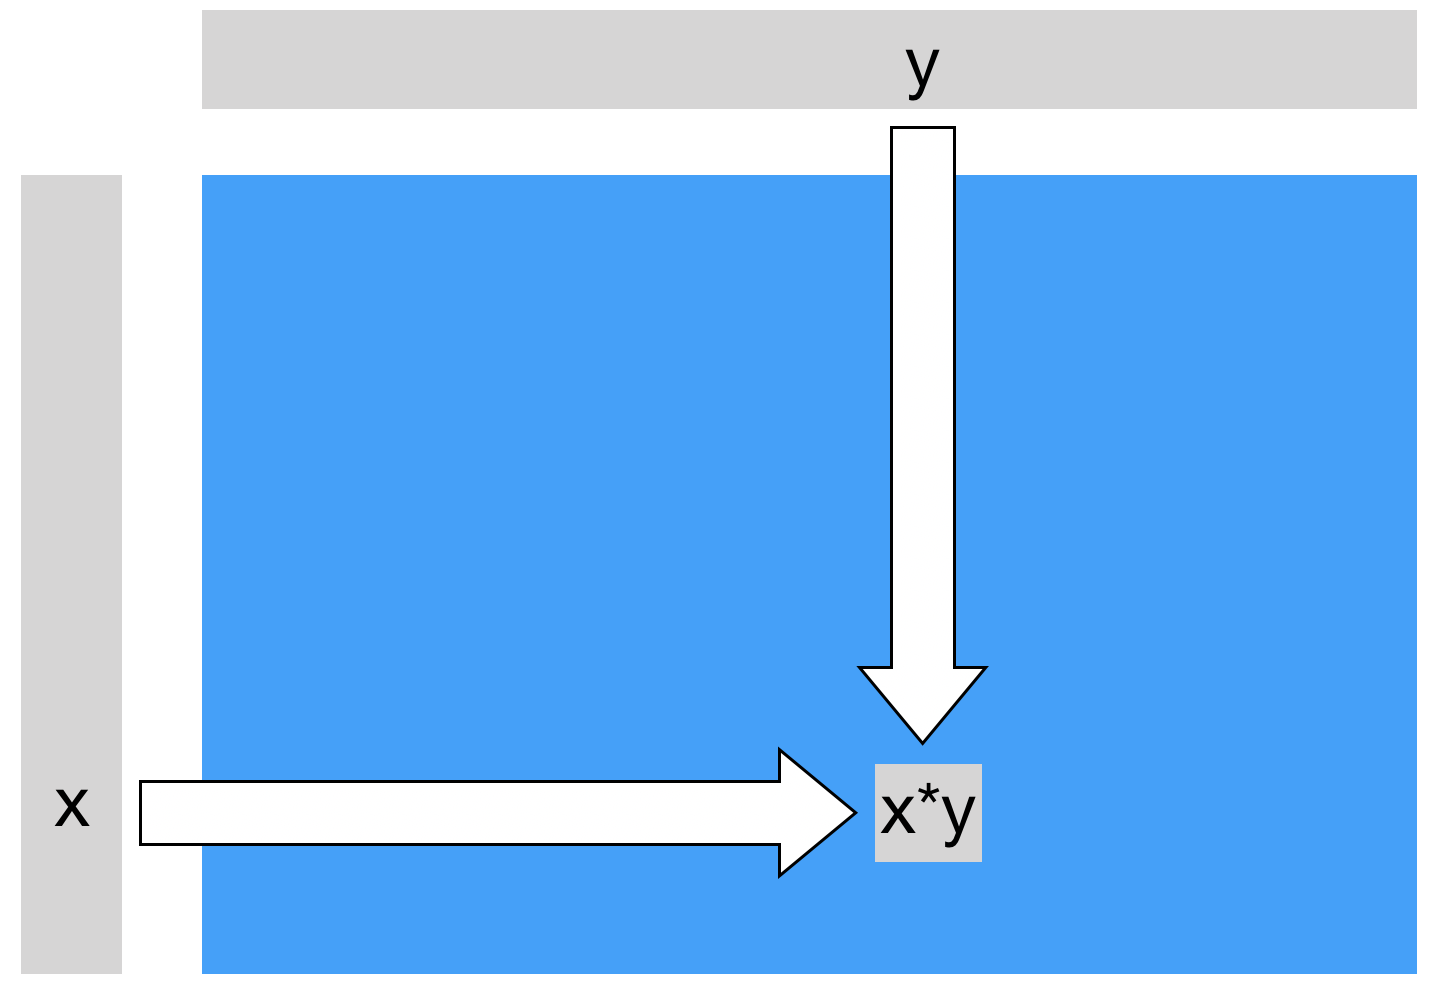

___Exercise:___ Write a function to evaluate `cos(sin(x))` and evaluate it for an 300x200 array of gaussian random numbers.

___Exercise:___ Open the $\julia$ manual at [julialang](https://docs.julialang.org/) and look up the help for "array comprehension". Use this syntax to make an square array with elements `i+j+3` with indices `i=4:10`, `j=1:20`. Pass this array to your previous function for `cos(sin(x))`.

## Anonymous functions
Another important way to define functions is called an *anonymous* function:

In [14]:
x -> x^2+1

#7 (generic function with 1 method)

In [15]:
ans(2) # it is anonymous, but we can still call it

5

- `ans` is always the result of the ___most recent evaluation___
- The main use of anonymous functions is passing them to other functions without having to declare a function name. 
- In $\julia$ functions are first class objects that can be passed as function arguments, just like variables. 

Anonymous functions can also have multiple arguments:

In [16]:
(x,y)->x^2+y

#9 (generic function with 1 method)

In [17]:
ans(1,2)

3

## Example: numerical integration

We can test out some of these ideas while getting familiar with a useful package: [QuadGK](https://github.com/JuliaMath/QuadGK.jl) provides simple realiable numerical inegration in one dimension. Examples speak volumes, so let's take a look.

In [13]:
using QuadGK, Plots

In [2]:
quadgk(x->x^2,0,1) # the result, and the error, returned as a "tuple"

(0.3333333333333333, 5.551115123125783e-17)

Just for fun, let's check the result of numerical integration for any polynomial we care to pass. The simplest way to get this done is to define a function (this is alawys true in $\julia$):

In [18]:
intpoly(k) = quadgk(x->x^k,0,1)[1]  # anonymous function, and [1] takes the first of 2 outputs

intpoly (generic function with 1 method)

In [19]:
intpoly(2)

0.3333333333333333

We can check against the analytic result:

$$\int_0^1 x^k dx = \frac{x^{k+1}}{k+1}\Big|_{0}^1=\frac{1}{k+1}$$

In [20]:
intpolyexact(k) = 1/(k+1)

intpolyexact (generic function with 1 method)

In [21]:
intpoly(4)

0.2

In [22]:
intpolyexact(4)

0.2

In [23]:
powers = 1:30:300
for k in powers
    intpoly(k) |> println
end

0.5
0.03125000000000001
0.016129032258064495
0.010869565217391314
0.008196721311475417
0.00657894736842106
0.005494505494505504
0.004716981132075482
0.00413223140495866
0.003676470588235276


In [24]:
for k in powers
    intpolyexact(k) |> println
end

0.5
0.03125
0.016129032258064516
0.010869565217391304
0.00819672131147541
0.006578947368421052
0.005494505494505495
0.0047169811320754715
0.004132231404958678
0.003676470588235294


This is a simple way to approach such questions. 

Is there another way? Let's try a __dot-call:__ (it worked for scalar input, so...)

In [25]:
intpoly.(powers)

10-element Array{Float64,1}:
 0.5                 
 0.03125000000000001 
 0.016129032258064495
 0.010869565217391314
 0.008196721311475417
 0.00657894736842106 
 0.005494505494505504
 0.004716981132075482
 0.00413223140495866 
 0.003676470588235276

In [26]:
intpolyexact.(powers)

10-element Array{Float64,1}:
 0.5                  
 0.03125              
 0.016129032258064516 
 0.010869565217391304 
 0.00819672131147541  
 0.006578947368421052 
 0.005494505494505495 
 0.0047169811320754715
 0.004132231404958678 
 0.003676470588235294 

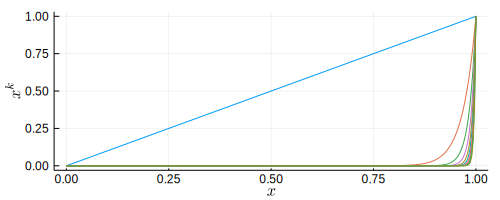

In [27]:
using Plots, LaTeXStrings
gr(size=(500,200),legend=false)

x=LinRange(0,1,300) # this behaves like a column vector in what follows

plot(x,x.^(powers'));xlabel!(L"x");ylabel!(L"x^k")

Note that `QuadGK` only integrates functions of one variable. 

___Exercise:___ Define a new function `intpoly2(k,y)` that integrates $x^k$ over the interval $(0,y)$. Evaluate this over both `k=1:10` and `y=1:5` simultaneously using a dot call. 

# Recap
We have seen some new juila syntax
- `function!(x,y)` is a convention that says "function will write over x"
- `.` refers to local operations in arrays
- `f.(x)` allows any function that works for scalars to work for arrays of compatible sizes
- `x.*y` works if (a) `x` and `y` are the same dimension, or (b) their dimensions allow an outer product to a larger array (e.g. column x row vector).
- Create arrays via `M = [a,b;c,d]` 
- Access elements using square brackets: `M[1,2]` will return `c`.

# Next time
- Functions II
- Loops
- Flow control